In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
!apt install unzip
!unzip /content/gdrive/MyDrive/Dataset.zip -d /content/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Archive:  /content/gdrive/MyDrive/Dataset.zip
  inflating: /content/Dataset/fashion.csv  
   creating: /content/Dataset/images/
  inflating: /content/Dataset/images/10037.jpg  
  inflating: /content/Dataset/images/10039.jpg  
  inflating: /content/Dataset/images/10054.jpg  
  inflating: /content/Dataset/images/10096.jpg  
  inflating: /content/Dataset/images/10097.jpg  
  inflating: /content/Dataset/images/10110.jpg  
  inflating: /content/Dataset/images/10174.jpg  
  inflating: /content/Dataset/images/10180.jpg  
  inflating: /content/Dataset/images/10266.jpg  
  inflating: /content/Dataset/images/10267.jpg  
  inflating: /content/Dataset/images/10268.jpg  
  inflating: /content/Dataset/images/10269.jpg  
  inflating: /content/Dataset/images/10292.jpg  
  inflating: /conte

In [ ]:
import pandas as pd

# Load the dataset
fashion_df = pd.read_csv('/content/Dataset/fashion.csv')

# Preview the dataset
print(fashion_df.head())

   ProductId Gender Category SubCategory ProductType Colour   Usage  \
0      42419  Girls  Apparel     Topwear        Tops  White  Casual   
1      34009  Girls  Apparel     Topwear        Tops  Black  Casual   
2      40143  Girls  Apparel     Topwear        Tops   Blue  Casual   
3      23623  Girls  Apparel     Topwear        Tops   Pink  Casual   
4      47154  Girls  Apparel  Bottomwear      Capris  Black  Casual   

                                  ProductTitle      Image  \
0           Gini and Jony Girls Knit White Top  42419.jpg   
1                Gini and Jony Girls Black Top  34009.jpg   
2  Gini and Jony Girls Pretty Blossom Blue Top  40143.jpg   
3   Doodle Kids Girls Pink I love Shopping Top  23623.jpg   
4             Gini and Jony Girls Black Capris  47154.jpg   

                                            ImageURL  
0  http://assets.myntassets.com/v1/images/style/p...  
1  http://assets.myntassets.com/v1/images/style/p...  
2  http://assets.myntassets.com/v1/images

In [ ]:
!pip uninstall tensorflow -y


Found existing installation: tensorflow 2.13.0
Uninstalling tensorflow-2.13.0:
  Successfully uninstalled tensorflow-2.13.0


In [ ]:
!pip install tensorflow


  Using cached tensorflow-2.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (524.1 MB)


In [ ]:
import tensorflow as tf
import keras

print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)


TensorFlow version: 2.13.0
Keras version: 2.13.1


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from sklearn.neighbors import NearestNeighbors
from glob import glob
import numpy as np
import joblib


In [ ]:
def extract_features(img_paths, model):
    features = []
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        feature = model.predict(img_array)
        features.append(feature.flatten())
    return np.array(features)


In [ ]:
# Path to the images
image_dir = '/content/Dataset/images/'
image_paths = glob(image_dir + '*.jpg')

# Load MobileNet model
model = MobileNet(weights='imagenet', include_top=False)

# Batch processing
batch_size = 32
image_batches = [image_paths[i:i + batch_size] for i in range(0, len(image_paths), batch_size)]

# Extract features
features = np.vstack([extract_features(batch, model) for batch in image_batches])

# Train a KNN model
knn = NearestNeighbors(n_neighbors=5, algorithm='auto')
knn.fit(features)

# Save KNN model
joblib.dump(knn, 'knn_model.pkl')


1/1 [==============================] - 0s 47ms/step


['knn_model.pkl']

In [ ]:
def find_similar_images(image_path, num_results=5):
    # Load KNN model
    knn_model = joblib.load('knn_model.pkl')

    # Extract features
    query_features = extract_features([image_path], model)

    # Get similar images
    distances, indices = knn_model.kneighbors(query_features, n_neighbors=num_results)
    similar_images = [image_paths[index] for index in indices.flatten()]

    return similar_images

# Test with a sample image path
image_path = '/content/Dataset/test_images/test_images/3.jpg'
similar_images = find_similar_images(image_path)
print(similar_images)


1/1 [==============================] - 0s 24ms/step
['/content/Dataset/images/37538.jpg', '/content/Dataset/images/39896.jpg', '/content/Dataset/images/15740.jpg', '/content/Dataset/images/37537.jpg', '/content/Dataset/images/37549.jpg']


In [ ]:
import matplotlib.pyplot as plt
def display_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for img_path, ax in zip(image_paths, axes):
        img = image.load_img(img_path, target_size=(224, 224))
        ax.imshow(img)
        ax.axis('off')
    plt.show()


1/1 [==============================] - 0s 19ms/step
['/content/Dataset/images/37538.jpg', '/content/Dataset/images/39896.jpg', '/content/Dataset/images/15740.jpg', '/content/Dataset/images/37537.jpg', '/content/Dataset/images/37549.jpg']


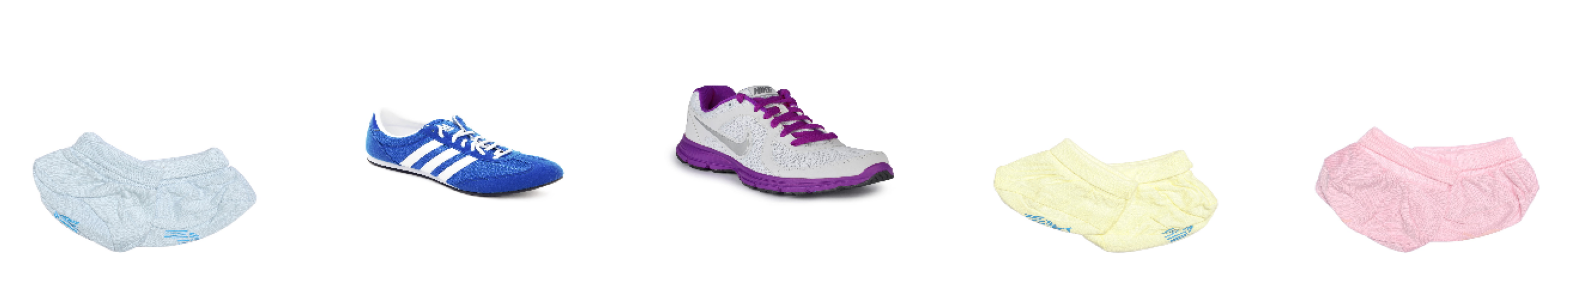

In [ ]:
# Test with a sample image path
image_path = '/content/Dataset/test_images/test_images/3.jpg'
similar_images = find_similar_images(image_path)
print(similar_images)

# Display the similar images
display_images(similar_images)


In [ ]:
!pip install scikit-learn==1.3.0

In [ ]:
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Load ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


In [ ]:
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = base_model.predict(preprocessed_img)
    return features.flatten()

def get_image_paths(folder):
    return glob(folder + '*.jpg')  # Adjust the extension as needed


In [ ]:
image_dir = '/content/Dataset/images/'  # Add paths to your images
image_paths = get_image_paths(image_dir)

# Use batch processing for efficiency
features = []
for image_path in image_paths:
    features.append(extract_features(image_path))
X = np.array(features)


1/1 [==============================] - 0s 46ms/step


In [ ]:
knn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
knn_model.fit(X)


NearestNeighbors(algorithm='ball_tree')

In [ ]:
def find_similar_images(img_path, num_results=5):
    query_features = extract_features(img_path)
    distances, indices = knn_model.kneighbors([query_features])
    similar_images = [image_paths[idx] for idx in indices.flatten()]
    return similar_images


In [ ]:
def display_images(image_paths):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(20, 5))
    for img_path, ax in zip(image_paths, axes):
        img = image.load_img(img_path, target_size=(224, 224))
        ax.imshow(img)
        ax.axis('off')
    plt.show()


1/1 [==============================] - 0s 27ms/step
['/content/Dataset/images/2828.jpg', '/content/Dataset/images/3790.jpg', '/content/Dataset/images/3150.jpg', '/content/Dataset/images/5050.jpg', '/content/Dataset/images/28637.jpg']


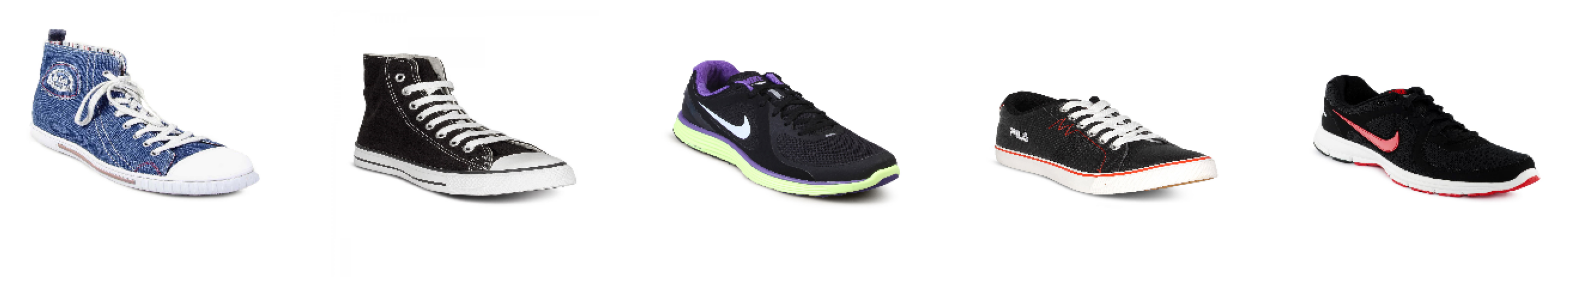

In [ ]:
# Test with a sample image path
test_image_path = '/content/Dataset/test_images/test_images/3.jpg'  # Change to your test image
similar_images = find_similar_images(test_image_path)
print(similar_images)

# Display the similar images
display_images(similar_images)


In [ ]:
!pip install joblib


In [ ]:
import joblib


In [ ]:
knn_model_path = 'knn_models.h5'  # Update with the correct file path
joblib.dump(knn_model, knn_model_path)


['knn_models.h5']

In [ ]:
from joblib import dump

# Save the KNN model
knn_model_path = 'knn_model.joblib'
dump(knn_model, knn_model_path)

# Optionally, you can also save the extracted features and image paths for faster loading
features_path = 'features.npy'
image_paths_path = 'image_paths.npy'
np.save(features_path, X)
np.save(image_paths_path, image_paths)


In [ ]:
!pip install scikit-learn==1.3.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
